<a href="https://colab.research.google.com/github/Hasifa1/Machine-learning-models/blob/main/multi_classification_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

In [55]:
df=pd.read_csv('/content/drive/MyDrive/certificates/Crop_recommendation.csv')

In [56]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [57]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [58]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [59]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [60]:
df.shape

(2200, 8)

In [61]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [62]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

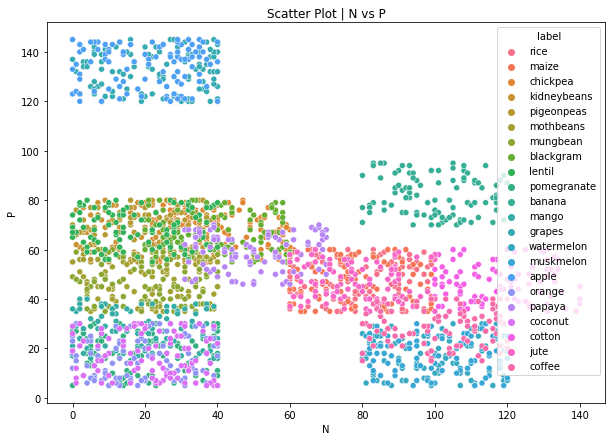

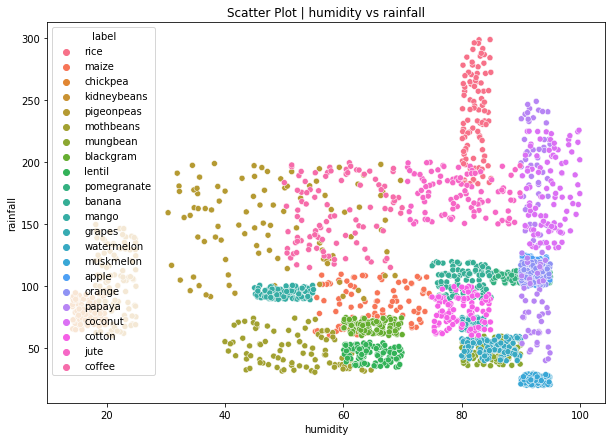

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2}")
plot_vs(df,'N','P','label')
plot_vs(df,'humidity','rainfall','label')

<Axes: xlabel='temperature', ylabel='humidity'>

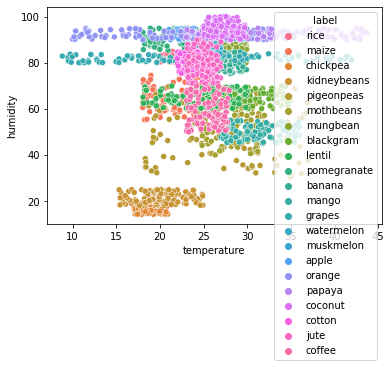

In [64]:
sns.scatterplot(x='temperature',y='humidity',hue='label',data=df)

/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='N', ylabel='temperature'>

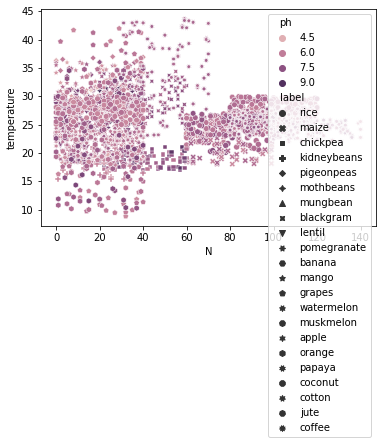

In [65]:
sns.scatterplot(x=df['N'],y=df['temperature'],hue=df['ph'],style=df['label'],cmap='YlGnBu')

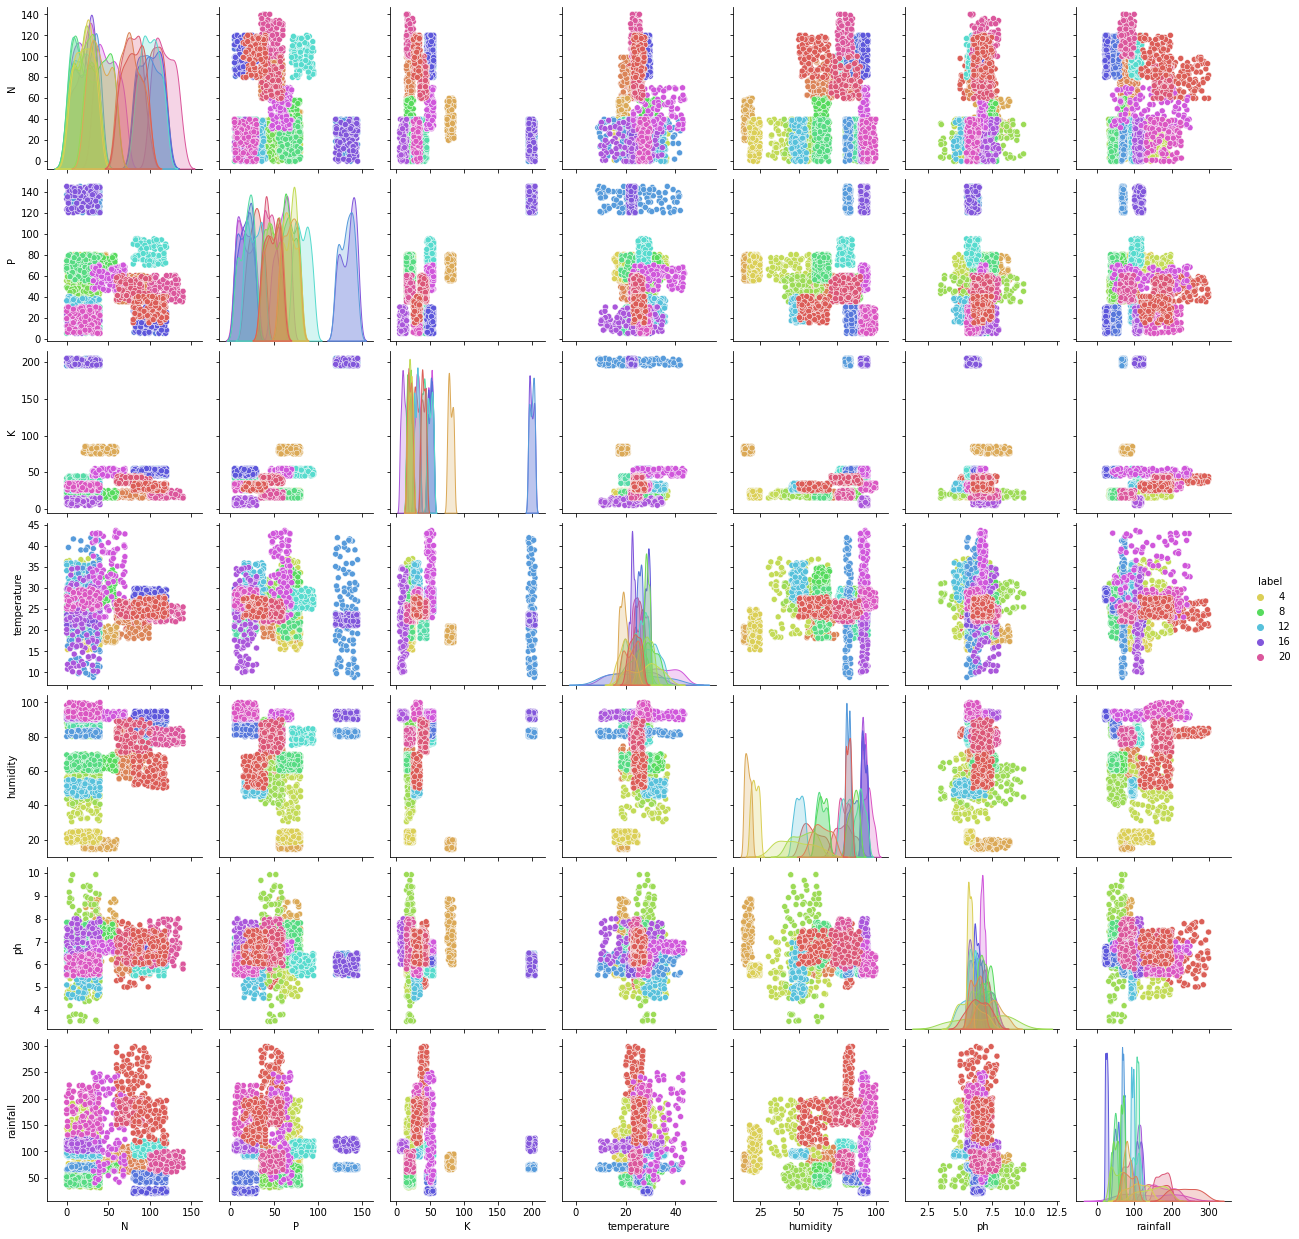

In [113]:
sns.pairplot(df,hue='label',palette='hls')
plt.show()

In [67]:
corr_mat=df.corr()
corr_mat

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

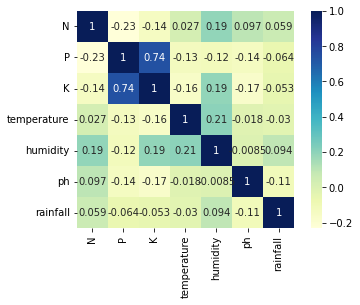

In [68]:
sns.heatmap(corr_mat,annot=True,square=True,cmap='YlGnBu')

<Axes: xlabel='K'>

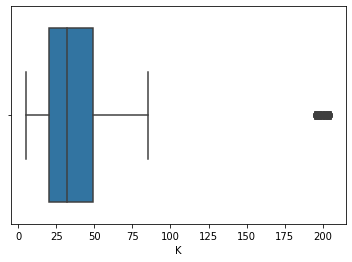

In [69]:
sns.boxplot(x=df['K'])

<Axes: xlabel='P'>

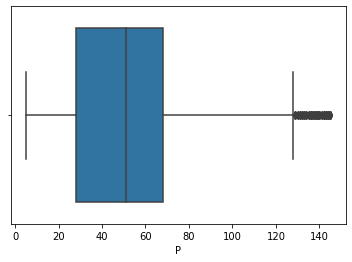

In [70]:
sns.boxplot(x=df['P'])

<Axes: xlabel='temperature'>

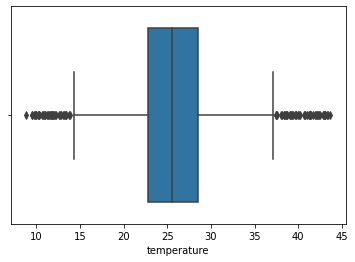

In [71]:
sns.boxplot(x=df['temperature'])

<Axes: xlabel='rainfall'>

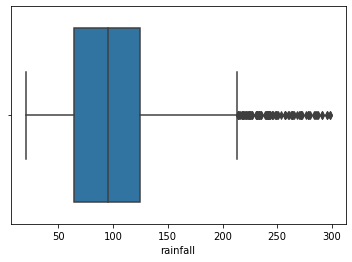

In [72]:
sns.boxplot(x=df['rainfall'])

<Axes: xlabel='humidity'>

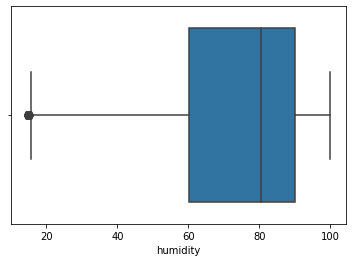

In [73]:
sns.boxplot(x=df['humidity'])

<Axes: xlabel='ph'>

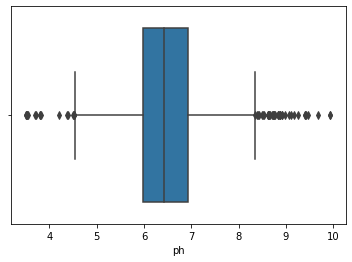

In [74]:
sns.boxplot(x=df['ph'])

Class **Distribution**

In [75]:
class_count=df['label'].value_counts()
class_count

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [76]:
class_name=class_count.index.tolist()#x-axis labels
class_values=class_count.values.tolist()#y-axis labels

In [77]:
class_name

['rice',
 'maize',
 'jute',
 'cotton',
 'coconut',
 'papaya',
 'orange',
 'apple',
 'muskmelon',
 'watermelon',
 'grapes',
 'mango',
 'banana',
 'pomegranate',
 'lentil',
 'blackgram',
 'mungbean',
 'mothbeans',
 'pigeonpeas',
 'kidneybeans',
 'chickpea',
 'coffee']

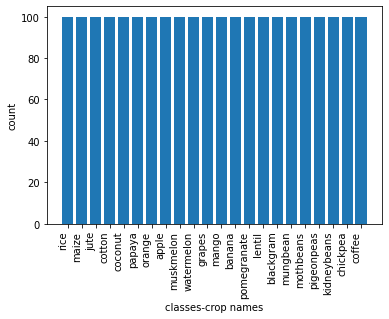

In [78]:
#bar chart
import matplotlib.pyplot as plt
plt.bar(class_name,class_values)
plt.xlabel('classes-crop names')
plt.ylabel('count')
plt.xticks(rotation=90,ha='right')
plt.show()

For alligning x ticks in seaborn plots use matplotlib only using set_xticklabels(labels=['apple','ba','bjhb',....],rotation=90)

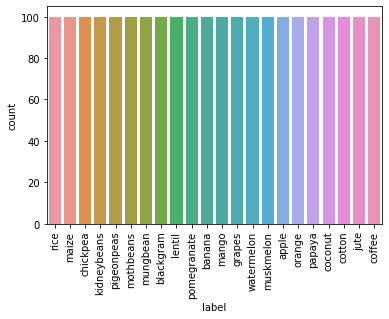

In [111]:
g=sns.countplot(x='label',data=df)
g.set_xticklabels(labels=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],rotation=90)
plt.show()

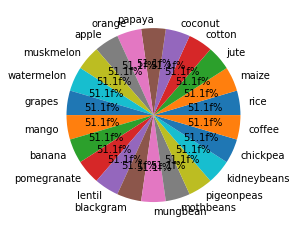

In [80]:
#pie chart
plt.pie(class_values,labels=class_name,autopct='51.1f%%')
plt.show()

**Data preprocessing**

In [81]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [82]:
df['label'].replace(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],inplace=True)

In [83]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


**Splitting data and training**

In [84]:
#load data
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=47)

In [86]:
#normalizing the data-standard scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
xtrain=sst.fit_transform(xtrain)#normalizing
xtest=sst.transform(xtest)

In [87]:
xtrain

array([[-1.10864679, -0.73537304, -0.2767465 , ..., -1.11671884,
        -0.94590478, -0.03514567],
       [ 0.56067207,  0.08058248, -0.21773586, ...,  0.67767261,
         0.0363311 ,  1.36440921],
       [-0.9470998 ,  2.40756672,  2.96883878, ...,  0.91802904,
        -0.82075271,  0.27710165],
       ...,
       [-0.78555281, -0.0705204 , -0.65048056, ...,  0.81027527,
         0.27751974, -1.01124696],
       [ 1.39533149, -0.22162327, -0.5717997 , ...,  0.51703507,
         0.21565828, -0.39422139],
       [-0.57015683, -0.55404959, -0.39476778, ..., -0.7762077 ,
         0.64811927, -0.22864996]])

In [88]:
xtest

array([[ 1.87997245, -0.16118212, -0.63081034, ...,  0.19709036,
         1.27744503, -0.57343502],
       [-0.57015683,  2.61911075,  2.89015792, ...,  0.88877171,
        -1.160458  ,  0.2609824 ],
       [-0.78555281, -1.09801994, -0.65048056, ...,  0.91523865,
         1.27618427,  0.29345731],
       ...,
       [ 1.04531302, -0.85625534,  0.03797692, ...,  0.90631761,
        -0.11225162, -1.44287557],
       [ 0.04910661,  0.35256765, -0.55212949, ..., -0.21469779,
         0.45128645, -0.6294816 ],
       [-0.48938334, -1.00735821, -0.25707628, ...,  1.21940844,
        -1.12429109,  0.77928781]])

In [89]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [90]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_pred=model.predict(xtest)

In [92]:
log_acc=model.score(sst.transform(x),y)
log_acc

0.9731818181818181

In [93]:
from sklearn.neighbors import   KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=20)

In [94]:
knn_clf.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [95]:
y_pred2=knn_clf.predict(xtest)

In [96]:
knn_acc=knn_clf.score(sst.transform(x),y)
knn_acc

0.9531818181818181

In [99]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [100]:
y_pred3=nb_clf.predict(xtest)

In [101]:
nb_acc=nb_clf.score(sst.transform(x),y)
nb_acc

0.9954545454545455

In [117]:
#deployment
import numpy as np
inputs=[float(x) for x in '74 35 40 26.491096 80 6 240'.split(' ')]
final=[np.array(inputs)]
pred=model.predict(sst.transform(final))
#print(pred)
crops=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
print("recommended crop: ",crops[pred[0]-1])

recommended crop:  rice


In [116]:
import numpy as np
inputs=[float(x) for x in '74 35 40 26.491096 80 6 240'.split(' ')]
final=[np.array(inputs)]
pred=knn_clf.predict(sst.transform(final))
#print(pred)
crops=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
print("recommended crop: ",crops[pred[0]-1])

recommended crop:  rice


In [115]:
import numpy as np
inputs=[float(x) for x in '74 35 40 26.491096 80 6 240'.split(' ')]
final=[np.array(inputs)]
pred=nb_clf.predict(sst.transform(final))
#print(pred)
crops=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
print("recommended crop: ",crops[pred[0]-1])

recommended crop:  rice
